5.913544279423275


/home/petka/UJEP/PSM/venv/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


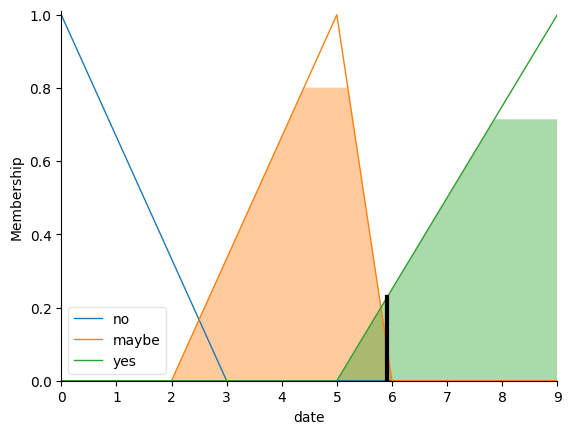

In [44]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import skfuzzy.control.visualization as vis

pretty = ctrl.Antecedent(np.arange(0, 10, 1), "pretty")
kind = ctrl.Antecedent(np.arange(0, 10, 1), "kind")
smart = ctrl.Antecedent(np.arange(0, 10, 1), "smart")
cook = ctrl.Antecedent(np.arange(0, 10, 1), "cook")

date = ctrl.Consequent(np.arange(0, 10, 1), "date")

pretty["witch"] = fuzz.trimf(pretty.universe, [0, 0, 3])
pretty["mid"] = fuzz.trapmf(pretty.universe, [2.5, 5, 6, 7.5])
pretty["hot"] = fuzz.trimf(pretty.universe, [6.5, 10, 10])

kind["mean"] = fuzz.gaussmf(kind.universe, 0, 1.5)
kind["dont_care"] = fuzz.gaussmf(kind.universe, 5, 1.5)
kind["very_kind"] = fuzz.gaussmf(kind.universe, 10, 1.5)

smart["dumb"] = fuzz.gaussmf(smart.universe, 0, 1.5)
smart["can_read"] = fuzz.gaussmf(smart.universe, 5, 1.5)
smart["very_smart"] = fuzz.gaussmf(smart.universe, 10, 1.5)

cook["nope"] = fuzz.gaussmf(cook.universe, 0, 1.5)
cook["spaghetti"] = fuzz.gaussmf(cook.universe, 5, 1.5)
cook["gordon"] = fuzz.gaussmf(cook.universe, 10, 1.5)

date["no"] = fuzz.trimf(date.universe, [0, 0, 3])
date["maybe"] = fuzz.trimf(date.universe, [2, 5, 6])
date["yes"] = fuzz.trapmf(date.universe, [5, 9, 10, 10])

rule1 = ctrl.Rule(
    pretty["hot"] & kind["very_kind"] & smart["very_smart"] & cook["gordon"],
    date["yes"],
)
rule2 = ctrl.Rule(
    (pretty["hot"] | kind["very_kind"] | smart["very_smart"]) | cook["gordon"],
    date["maybe"],
)
rule3 = ctrl.Rule((pretty["mid"] | kind["mean"] | smart["can_read"]), date["maybe"])
rule4 = ctrl.Rule((pretty["witch"] | smart["dumb"] | cook["nope"]), date["no"])

date_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

date_sim = ctrl.ControlSystemSimulation(date_ctrl)

date_sim.input["pretty"] = 10
date_sim.input["kind"] = 10
date_sim.input["smart"] = 10
date_sim.input["cook"] = 10

date_sim.compute()

print(date_sim.output["date"])
date.view(sim=date_sim)

In [45]:
import random
import pandas as pd

pretty_vals = [random.randint(0, 10) for i in range(100)]
cook_vals = [random.randint(0, 10) for i in range(100)]
kind_vals = [random.randint(0, 10) for i in range(100)]
smart_vals = [random.randint(0, 10) for i in range(100)]

df = pd.DataFrame(
    {"pretty": pretty_vals, "cook": cook_vals, "kind": kind_vals, "smart": smart_vals}
)
outputs = []

for i in range(len(df)):
    date_sim.input["pretty"] = df.pretty.iloc[i]
    date_sim.input["kind"] = df.kind.iloc[i]
    date_sim.input["smart"] = df.smart.iloc[i]
    date_sim.input["cook"] = df.cook.iloc[i]

    date_sim.compute()

    outputs.append(date_sim.output["date"])

df["outputs"] = outputs

In [46]:
df

,pretty,cook,kind,smart,outputs
0,8,3,7,5,3.905855
1,1,5,9,1,2.906338
2,9,6,6,8,4.439686
3,8,10,8,9,5.553033
4,10,10,7,1,2.906339
...,...,...,...,...,...
95,9,10,1,4,4.203073
96,7,8,10,1,2.906339
97,3,3,5,3,3.604857
98,1,1,8,8,2.533509


In [47]:
df.loc[df["outputs"] == df["outputs"].max()]

,pretty,cook,kind,smart,outputs
3,8,10,8,9,5.553033
